In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute('''
CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL


)


''')

In [4]:
data = [
    ('Pen', 10, 5.0),
    ('Notebook', 5, 20.0),
    ('Pencil', 15, 2.0),
    ('Pen', 20, 5.0),
    ('Notebook', 10, 20.0),
    ('Pencil', 30, 2.0)
]


In [5]:
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', data)

In [6]:
conn.commit()
conn.close()

In [7]:
print(" DATAbase created.")

 DATAbase created.


In [8]:
import pandas as pd 
import matplotlib.pyplot as plt

In [9]:
conn = sqlite3.connect("sales_data.db")

In [10]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price ) AS revenue
FROM
    sales
GROUP BY
     product
"""

In [11]:
df = pd.read_sql_query(query, conn)
conn.close()

# Display the result
print("📊 Sales Summary:")
print(df)

📊 Sales Summary:
    product  total_qty  revenue
0  Notebook         15    300.0
1       Pen         30    150.0
2    Pencil         45     90.0


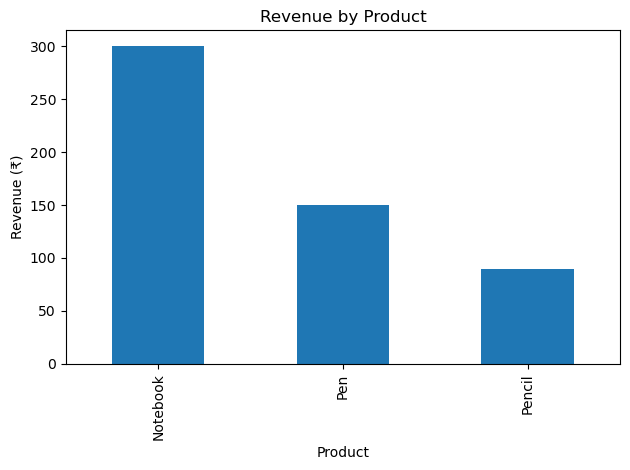

In [12]:
# 
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.savefig("sales_chart.png")  
plt.show()
